In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
import pandas as pd
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor
import pickle;

In [2]:
train = pd.read_csv('../input/big-mart-sales-dataset/Train_UWu5bXk.csv');
test = pd.read_csv('../input/big-mart-sales-dataset/Test_u94Q5KV.csv')

In [3]:
train.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
test.head()

In [ ]:
train.isnull().sum()/train.shape[0]*100

In [ ]:
test.isnull().sum()/test.shape[0]*100

In [4]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [5]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [6]:
train.update(train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0]));
test.update(test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0]));

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
for var in train['Item_Type'].unique():
    train.update(train[train.loc[:,'Item_Type'] == var]['Item_Weight'].replace(np.nan,train[train.loc[:,'Item_Type'] == var]['Item_Weight'].mean()));

In [10]:
for var in test['Item_Type'].unique():
    test.update(test[test.loc[:,'Item_Type'] == var]['Item_Weight'].replace(np.nan,test[test.loc[:,'Item_Type'] == var]['Item_Weight'].mean()));

In [11]:
test.isnull().sum()/test.shape[0]*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [12]:
train = train.drop(columns = ['Item_Identifier', 'Outlet_Identifier'], axis =1);
test = test.drop(columns = ['Item_Identifier', 'Outlet_Identifier'], axis =1);

In [13]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
f = {'Low Fat': 1, 'Regular': 2, 'low fat': 3, 'LF': 4, 'reg': 5};
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(f);
test['Item_Fat_Content'] = test['Item_Fat_Content'].map(f)

In [15]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [16]:
t = {'Dairy': 1, 'Soft Drinks': 2, 'Meat': 3, 'Fruits and Vegetables' : 4,
       'Household': 5, 'Baking Goods': 6, 'Snack Foods': 7, 'Frozen Foods': 8,
       'Breakfast': 9, 'Health and Hygiene' :10, 'Hard Drinks': 11, 'Canned': 12,
       'Breads': 13, 'Starchy Foods': 15, 'Others': 14, 'Seafood': 16};
train['Item_Type'] = train['Item_Type'].map(t);
test['Item_Type'] = test['Item_Type'].map(t)

In [17]:
s = {'Medium': 2, 'High': 3, 'Small': 1};
train['Outlet_Size'] = train['Outlet_Size'].map(s);
test['Outlet_Size'] = test['Outlet_Size'].map(s)

In [18]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,1,249.8092,1999,2,Tier 1,Supermarket Type1,3735.1380
1,5.92,2,0.019278,2,48.2692,2009,2,Tier 3,Supermarket Type2,443.4228
2,17.50,1,0.016760,3,141.6180,1999,2,Tier 1,Supermarket Type1,2097.2700
3,19.20,2,0.000000,4,182.0950,1998,2,Tier 3,Grocery Store,732.3800
4,8.93,1,0.000000,5,53.8614,1987,3,Tier 3,Supermarket Type1,994.7052


In [19]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
l = {'Tier 1': 1, 'Tier 3': 3, 'Tier 2': 2};
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map(l);
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map(l)

In [21]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [22]:
y = {'Supermarket Type1': 2, 'Supermarket Type2': 3, 'Grocery Store': 1,
       'Supermarket Type3': 4};
train['Outlet_Type'] = train['Outlet_Type'].map(y);
test['Outlet_Type'] = test['Outlet_Type'].map(y)

In [23]:
train.head(8)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30000,1,0.016047,1,249.8092,1999,2,1,2,3735.1380
1,5.92000,2,0.019278,2,48.2692,2009,2,3,3,443.4228
2,17.50000,1,0.016760,3,141.6180,1999,2,1,2,2097.2700
3,19.20000,2,0.000000,4,182.0950,1998,2,3,1,732.3800
4,8.93000,1,0.000000,5,53.8614,1987,3,3,2,994.7052
5,10.39500,2,0.000000,6,51.4008,2009,2,3,3,556.6088
6,13.65000,2,0.012741,7,57.6588,1987,3,3,2,343.5528
7,12.98788,1,0.127470,7,107.7622,1985,2,3,4,4022.7636


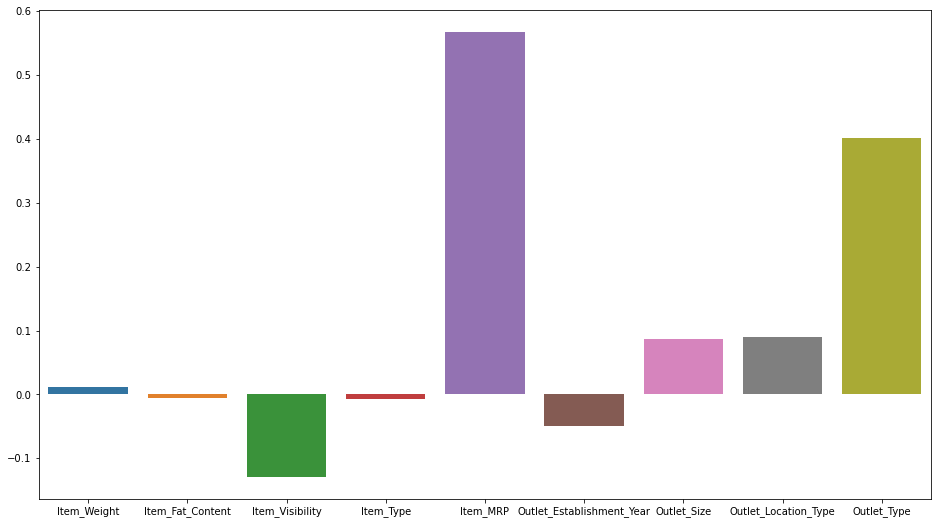

In [24]:
plt.figure(figsize = (16,9))
fineTech_appData3 = train.drop(['Item_Outlet_Sales'], axis = 1) # drop 'enrolled' feature
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(train['Item_Outlet_Sales']))

In [25]:
train = train.drop(columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year' ], axis =1);
test = test.drop(columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year' ], axis =1);

In [26]:
train.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,2,1,2,3735.1380
1,0.019278,48.2692,2,3,3,443.4228
2,0.016760,141.6180,2,1,2,2097.2700
3,0.000000,182.0950,2,3,1,732.3800
4,0.000000,53.8614,3,3,2,994.7052


In [27]:
x = train.drop(columns  = ['Item_Outlet_Sales'], axis =1);
y = train['Item_Outlet_Sales']

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [29]:
rfc = RandomForestRegressor();
rfc.fit(xtrain, ytrain)

RandomForestRegressor()

In [30]:
rfc.score(xtest, ytest)

0.529785696297465

In [31]:
xgb = XGBRegressor();
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
xgb.score(xtest, ytest)

0.5235477592236695

In [34]:
knn = KNeighborsRegressor();
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [35]:
knn.score(xtest, ytest)

0.46016174919605346

In [36]:
dc = DecisionTreeRegressor();
dc.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [37]:
dc.score(xtest, ytest)

0.17739936357558328